# Chapter 6. Design Patterns with First-Class Functions 

## Case study: Refactoring Strategy 

* Customers with 1,000 or more fidelity points get a global 5% discount per order. 
* A 10% discount is applied to each line item with 20 or more units in the same order. 
* Orders with at least 10 distinct items get a 7% global discount 

**Example 6-1.** Implementation Order class with pluggalbe discount strategeis 

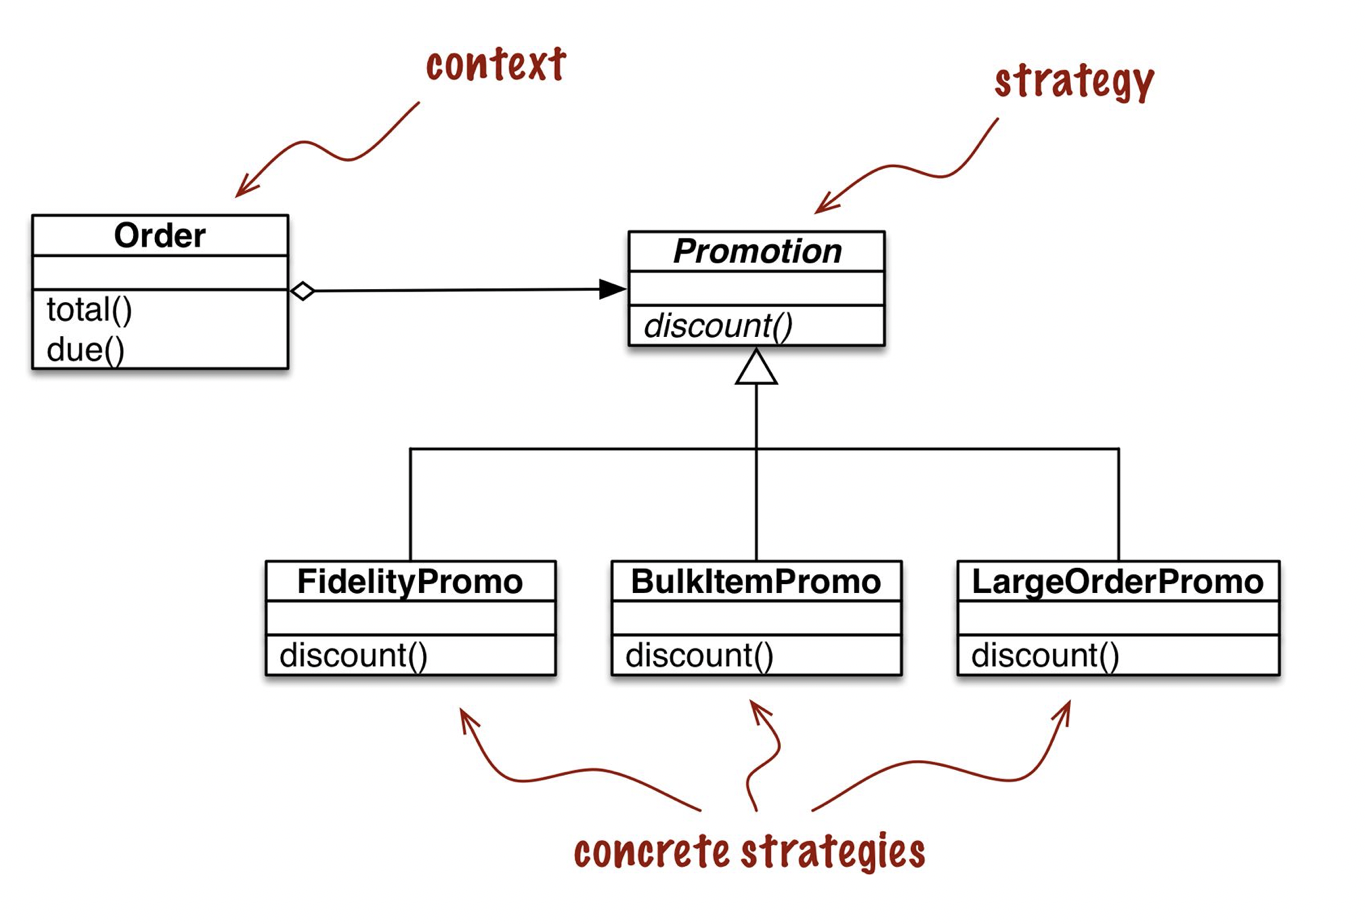

In [13]:
from IPython.display import Image
Image(filename='chapter6image.png')

In [3]:
from abc import ABC, abstractmethod
from collections import namedtuple

In [4]:
Customer = namedtuple('Customer','name fidelity')

In [5]:
class LineItem: 
    
    def __init__(self, product, quantity, price):
        self.product = product
        self.quantity = quantity
        self.price = price 
        
    def total(self):
        return self.price * self.quantity 

In [23]:
class Order:
    
    def __init__(self, customer, cart, promotion=None):
        self.customer = customer
        self.cart = list(cart)
        self.promotion = promotion 
    
    def total(self):
        if not hasattr(self,'__total'):
            self.__total = sum(item.total() for item in self.cart)
        return self.__total 
    
    def due(self):
        if self.promotion is None:
            discount = 0
        else:
            discount = self.promotion.discount(self)
        return self.total() - discount 
    
    def __repr__(self):
        fmt = '<Order total: {:.2f} due: {:.2f}>'
        return fmt.format(self.total(),self.due())

In [7]:
class Promotion(ABC):
    
    @abstractmethod
    def discount(self,order):
        """Return discount as a positive dolloar amount"""

In [8]:
class FidelityPromo(Promotion): # First Concrete Strategy 
    
    """5% discount for customers with 1000 or more fidelity points"""
    
    def discount(self,order):
        return order.total()* .05 if order.customer.fidelity >=100 else 0

In [9]:
class BulkItemPromo(Promotion): # Second Concrete Strategy 
    
    """10% discount for each LinItem with 20 or more units"""
    
    def discount(self,order):
        discount = 0
        for item in order.cart:
            if item.quantity >=20:
                discount += item.total()*0.1
        return discount 

In [10]:
class LargeOrderPromo(Promotion): # Third Concrete Strategy 
    
    """7% discount for orderw with 10 or more distinct items"""
    
    def discount(self,order):
        distinct_items = {item.product for item in order.cart}
        if len(distinct_items) >=10:
            return order.total()* .07
        return 0 

**Example 6-2.** Sample usage of Order class with different promotions applied 

In [14]:
joe = Customer('John Doe',0)

In [15]:
ann = Customer('Ann Smith',1100)

In [16]:
cart = [LineItem('banana', 4, 0.5),
       LineItem('apple',10, 1.5),
       LineItem('watermellon',5,5.0)]

In [24]:
Order(joe,cart,FidelityPromo())

<Order total: 42.00 due: 42.00>

In [25]:
Order(ann,cart,FidelityPromo())

<Order total: 42.00 due: 39.90>

In [26]:
banana_cart = [LineItem('banana', 30, 0.5),
              LineItem('apple',10,1.5)]

In [27]:
Order(joe, banana_cart, BulkItemPromo())

<Order total: 30.00 due: 28.50>

In [28]:
long_order = [LineItem(str(item_code), 1, 1.0) for item_code in range(10)]

In [29]:
Order(joe, long_order, LargeOrderPromo())

<Order total: 10.00 due: 9.30>

In [31]:
Order(joe,cart,LargeOrderPromo())

<Order total: 42.00 due: 42.00>

* **Example 6-1** works perfectly well, but the same functionality can be implemented with less code in Python by using functions as objects 

**Example 6-3.** Order class with discount strategies implemented as functions 

In [32]:
from collections import namedtuple

In [33]:
Customer = namedtuple('Customer','name fidelity')

In [34]:
class LineItem:
    
    def __init__(self, product, quantity, price):
        self.product = product 
        self.quantity = quantity 
        self. price = price 
    
    def total(self):
        return self.price * self.quantity

In [35]:
class Order: 
    
    def __init__(self, customer, cart, promotion=None):
        self.customer = customer 
        self.cart = list(cart)
        self.promotion = promotion 
    
    def total(self):
        if not hasattr(self,'__total'):
            self.__total = sum(item.total() for item in self.cart)
        return self.__total
    
    def due(self):
        if self.promotion is None: 
            discount = 0
        else:
            discount = self.promotion(self)
        return self.total() - discount 
    
    def __repr__(self):
        fmt = '<Order total: {:.02f} due: {:.2f}>'
        return fmt.format(self.total(), self.due())

In [36]:
def fidelity_promo(order):
    
    """5% discount for customers with 1000 or more fidelity points"""
    
    return order.total()*0.05 if order.customer.fidelity >=1000 else 0

In [37]:
def bulk_item_promo(order):
    
    """10% discount for each LineItem with 20 or more units """
    
    discount = 0
    for item in order.cart:
        if item.quantity >=20:
            discount += item.total()*0.1
    return discount 

In [38]:
def large_order_promo(order):
    
    """7% discount for orders with 10 or more distinct items"""
    
    distinct_items = {item.product for item in order.cart}
    if len(distinct_items) >=10:
        return order.total() *0.07
    return 0

**Example 6-4.** Sample usage of Order class with promotions as functions.

In [39]:
joe = Customer('John Doe',0)

In [40]:
ann = Customer('Ann Smith',1100)

In [41]:
cart = [LineItem('banana',4,0.5),
       LineItem('apple',10,1.5),
       LineItem('watermellon',5,5)]

In [42]:
Order(joe,cart,fidelity_promo)

<Order total: 42.00 due: 42.00>

In [43]:
Order(ann,cart,fidelity_promo)

<Order total: 42.00 due: 39.90>

In [44]:
banana_cart = [LineItem('banana',30,0.5),
              LineItem('apple',10,1.5)]

In [45]:
Order(joe,banana_cart, bulk_item_promo)

<Order total: 30.00 due: 28.50>

In [46]:
long_order = [LineItem(str(item_code),1,1.0)
             for item_code in range(10)]

In [47]:
Order(joe, long_order, large_order_promo)

<Order total: 10.00 due: 9.30>

In [48]:
Order(joe, cart, large_order_promo)

<Order total: 42.00 due: 42.00>

**Example 6-6.** best_promo finds the max discount iterating over a list of functions 

In [50]:
# list of the functions implemented as functions 
promos = [fidelity_promo, bulk_item_promo, large_order_promo]

In [51]:
def best_promo(order):
    
    """Select best discount available"""
    
    return max(promo(order) for promo in promos)
    # using a generator expression, we apply each of hte fucntions from 
    # promos to the order, and return the maximum discount computed./ 

**Example 6-7.** The promos list is built by introspection of the module global namespace.

globals( ) :

    Return a discionary representing the current global symbol table. This is always the dictionary of the current module (inside a function or method, this is the module where it is defined, not the module from which it is called)

In [56]:
# Short example of globals()

age = 23

globals()['age'] = 25
print('The age is:', age)

The age is: 25


In [53]:
promos = [globals()[name] for name in globals()
         if name.endswith('_promo')
         and name !='best_promo']

In [58]:
def best_promo(order):
    
    """Select best discount available"""
    
    return max(promo(order) for promo in promos)

## Command

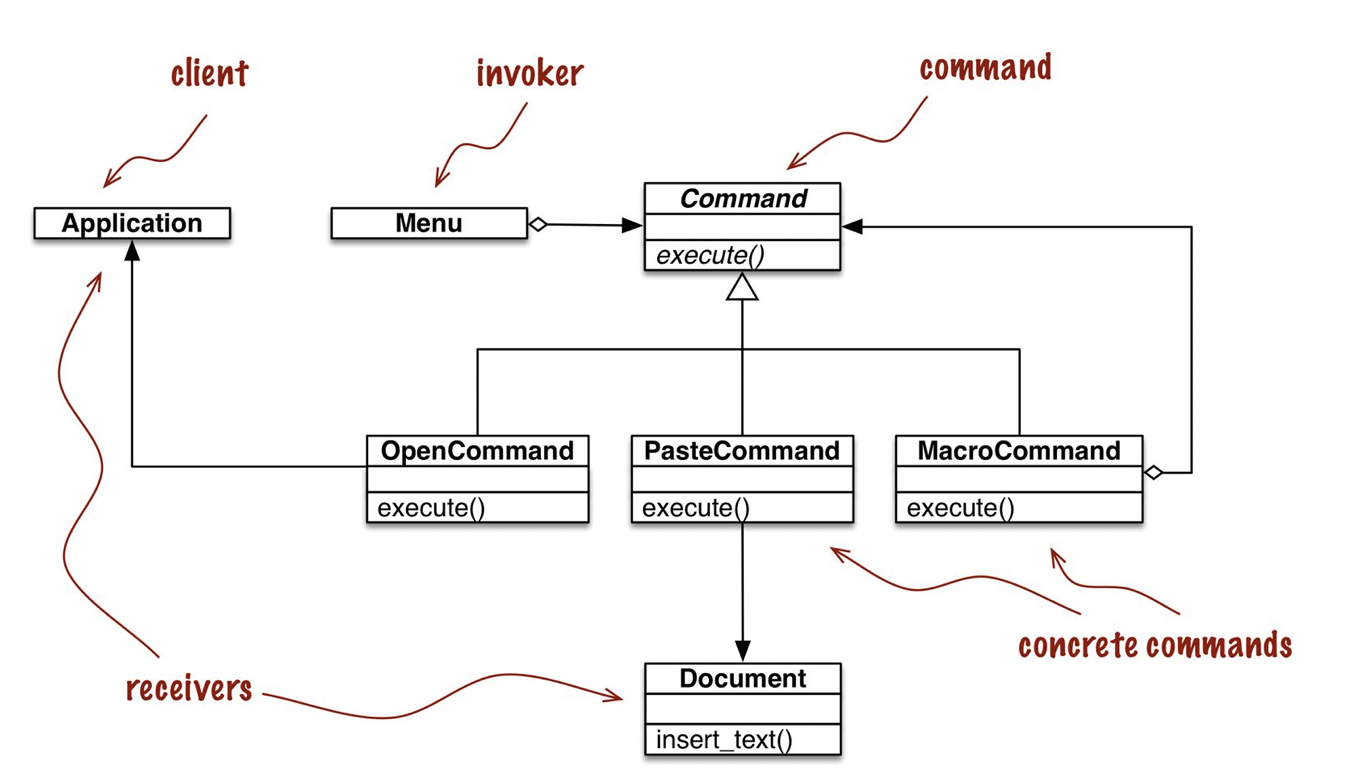

In [59]:
Image(filename='6command.png')

* The goal of Command is to decouple an object that invokes an operation (the Inoker) from the provider object that implements it (the Receiver).
* The idea is to put a Command object between the two, implementing an interface with a single method, execute, which calls some method in the Receiver to perform the desired operation.

**Example 6-9.** Each instance of MacroCommand has an internal list of commands. 

In [60]:
class MacroCommand:
    
    """A command that executes a list of commands"""
    
    def __init__(self,commands):
        self.commands = list(commands) #Buid a list from the commands arguments
        # ensures that it is iterable and keeps a local copy of the command 
        # references in each MacroCommand instance 
    
    def __call__(self):
        for command in self.commands:
            command()